# Carga de librerias

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

# Carga de Datos

In [4]:
train_data = pd.read_csv('../data/processed/train_final.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Fare_Per_Person,Age_Category_Child,Age_Category_Teen,Age_Category_Adult,Age_Category_Middle Age,Age_Category_Senior,Fare_Category_Low,Fare_Category_Medium,Fare_Category_High,Fare_Category_Very High
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,U,...,3.62500,False,False,True,False,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,...,35.64165,False,False,True,False,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,U,...,7.92500,False,False,True,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,...,26.55000,False,False,True,False,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,U,...,8.05000,False,False,True,False,False,False,True,False,False


In [5]:
train_data.drop(['Name', 'Ticket', 'Cabin', 'Title'], axis=1, inplace=True)

In [6]:
print(train_data.dtypes)

PassengerId                  int64
Survived                     int64
Pclass                       int64
Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Sex_female                    bool
Sex_male                      bool
Embarked_C                    bool
Embarked_Q                    bool
Embarked_S                    bool
FamilySize                   int64
Fare_Per_Person            float64
Age_Category_Child            bool
Age_Category_Teen             bool
Age_Category_Adult            bool
Age_Category_Middle Age       bool
Age_Category_Senior           bool
Fare_Category_Low             bool
Fare_Category_Medium          bool
Fare_Category_High            bool
Fare_Category_Very High       bool
dtype: object


# Configuracion de variables

In [8]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento de Modelo

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predicciones

In [13]:
y_pred = model.predict(X_test)

# Evaluacion del modelo

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8268156424581006


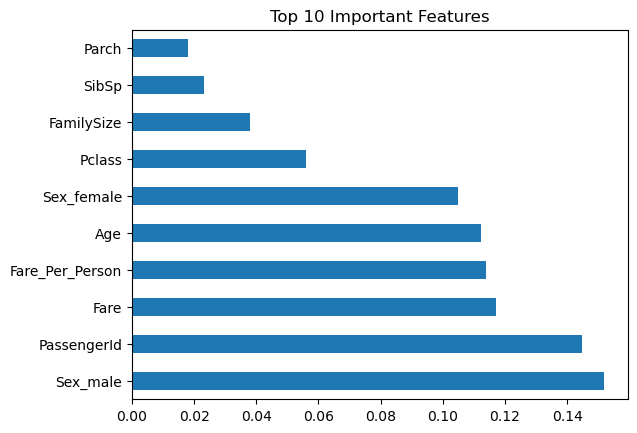

In [16]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Cargar de datos preprocesados

In [36]:
train_data = pd.read_csv('../data/processed/train_final.csv')

In [38]:
print("Columnas originales:", train_data.columns.tolist())

Columnas originales: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Title', 'Fare_Per_Person', 'Age_Category_Child', 'Age_Category_Teen', 'Age_Category_Adult', 'Age_Category_Middle Age', 'Age_Category_Senior', 'Fare_Category_Low', 'Fare_Category_Medium', 'Fare_Category_High', 'Fare_Category_Very High']


#### columnas a eliminar

In [41]:
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Title']

In [43]:
train_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [45]:
print("Columnas después de eliminar:", train_data.columns.tolist())

Columnas después de eliminar: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Fare_Per_Person', 'Age_Category_Child', 'Age_Category_Teen', 'Age_Category_Adult', 'Age_Category_Middle Age', 'Age_Category_Senior', 'Fare_Category_Low', 'Fare_Category_Medium', 'Fare_Category_High', 'Fare_Category_Very High']


In [47]:
train_data.to_csv('../data/processed/train_final_cleaned.csv', index=False)

In [49]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [51]:
print(X.dtypes)

PassengerId                  int64
Pclass                       int64
Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Sex_female                    bool
Sex_male                      bool
Embarked_C                    bool
Embarked_Q                    bool
Embarked_S                    bool
FamilySize                   int64
Fare_Per_Person            float64
Age_Category_Child            bool
Age_Category_Teen             bool
Age_Category_Adult            bool
Age_Category_Middle Age       bool
Age_Category_Senior           bool
Fare_Category_Low             bool
Fare_Category_Medium          bool
Fare_Category_High            bool
Fare_Category_Very High       bool
dtype: object


# modelo y los parámetros para GridSearchCV

In [53]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV

In [57]:
grid_search = GridSearchCV(estimator=rf, param_grid={'n_estimators': [100]}, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X, y)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros: {'n_estimators': 100}
Mejor precisión: 0.8148148148148149


# Aumento de Hiperparámetros

In [60]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X, y)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mejor precisión: 0.835019772770071


# Evaluacion Final del Modelo

In [63]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('Accuracy en el conjunto de prueba:', accuracy_score(y_test, y_pred))

Accuracy en el conjunto de prueba: 0.8938547486033519


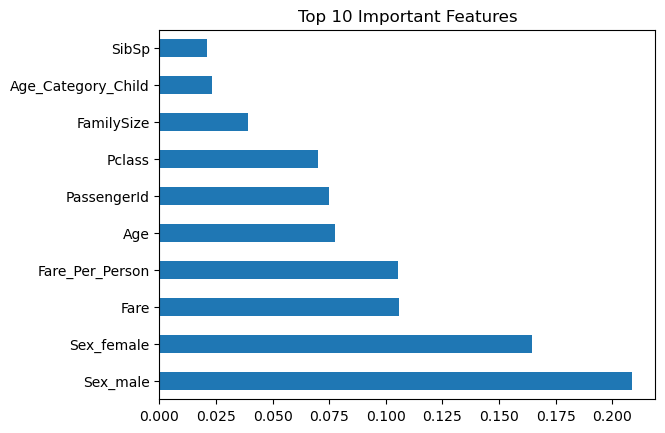

In [65]:
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Preparación para la Producción

In [70]:
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']